# Trabajando con series temporales

Pandas fue desarrollado en el contexto de la modelización financiera, por lo que, como es de esperar, contiene un conjunto bastante amplio de herramientas para trabajar con fechas, horas y datos indexados en el tiempo.
Los datos de fecha y hora vienen en varios sabores, que discutiremos aquí:

- *Time stamps* que hacen referencia a momentos particulares en el tiempo (por ejemplo, el 4 de julio de 2015 a las 7:00 am).
- Los *Time intervals* y los *periods* hacen referencia a una longitud de tiempo entre un punto de inicio y un punto final concretos; por ejemplo, el año 2015. Los períodos suelen hacer referencia a un caso especial de intervalos de tiempo en el que cada intervalo tiene una longitud uniforme y no se solapa (por ejemplo, períodos de 24 horas que comprenden días).
- Los *deltas* o *duraciones* hacen referencia a una longitud exacta de tiempo (por ejemplo, una duración de 22,56 segundos).

En esta sección, presentaremos cómo trabajar con cada uno de estos tipos de datos de fecha/hora en Pandas.
Esta breve sección no es en absoluto una guía completa de las herramientas de series temporales disponibles en Python o en Pandas, sino que pretende ser una visión general de cómo debería usted, como usuario, abordar el trabajo con series temporales.
Empezaremos con una breve discusión de las herramientas para tratar con fechas y horas en Python, antes de pasar más específicamente a una discusión de las herramientas proporcionadas por Pandas.
Después de enumerar algunos recursos que profundizan en el tema, revisaremos algunos ejemplos breves de trabajo con datos de series temporales en Pandas.

## Fechas y tiempos en Python

El mundo de Python tiene un número de representaciones disponibles de fechas, tiempos, deltas y espacios de tiempo.
Aunque las herramientas de series temporales proporcionadas por Pandas tienden a ser las más útiles para las aplicaciones de ciencia de datos, es útil ver su relación con otros paquetes utilizados en Python.

### Fechas y horas nativas de Python: ``datetime`` y ``dateutil``

Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo incorporado ``datetime``.
Junto con el módulo de terceros ``dateutil``, puedes utilizarlo para realizar rápidamente una serie de funcionalidades útiles sobre fechas y horas.
Por ejemplo, puedes construir manualmente una fecha utilizando el tipo ``datetime``:

In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

O, utilizando el módulo ``dateutil``, puede analizar las fechas a partir de una variedad de formatos de cadena:

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Una vez que tienes un objeto ``datetime``, puedes hacer cosas como imprimir el día de la semana:

In [ ]:
date.strftime('%A')

'Saturday'

En la última línea, hemos utilizado uno de los códigos de formato de cadena estándar para imprimir fechas (``"%A"``), que puedes leer en la sección [strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) de la [documentación de datetime](https://docs.python.org/3/library/datetime.html). de Python
La documentación de otras utilidades de fecha se puede encontrar en la [documentación online de dateutil](http://labix.org/python-dateutil).
Un paquete relacionado que hay que tener en cuenta es [``pytz``](http://pytz.sourceforge.net/), que contiene herramientas para trabajar con la parte de los datos de series temporales que más migra: las zonas horarias.

El poder de ``datetime`` y ``dateutil`` reside en su flexibilidad y fácil sintaxis: puedes utilizar estos objetos y sus métodos incorporados para realizar fácilmente casi cualquier operación que te interese.
El problema es cuando se desea trabajar con grandes matrices de fechas y horas:
Al igual que las listas de variables numéricas de Python son subóptimas comparadas con las matrices numéricas mecanografiadas al estilo de NumPy, las listas de objetos datetime de Python son subóptimas comparadas con las matrices mecanografiadas de fechas codificadas.

### Arrays de tiempo mecanografiadas: ``datetime64`` de NumPy

Las debilidades del formato datetime de Python inspiraron al equipo de NumPy a añadir un conjunto de tipos de datos de series temporales nativos a NumPy.
El tipo de datos ``datetime64`` codifica las fechas como enteros de 64 bits, y por lo tanto permite representar matrices de fechas de forma muy compacta.
El ``datetime64`` requiere un formato de entrada muy específico:

In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

Sin embargo, una vez que tenemos esta fecha formateada, podemos realizar rápidamente operaciones vectoriales sobre ella:

In [ ]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

Debido al tipo uniforme de los arrays ``datetime64`` de NumPy, este tipo de operación puede realizarse mucho más rápidamente que si trabajáramos directamente con los objetos ``datetime`` de Python, especialmente cuando los arrays se hacen grandes
(introducimos este tipo de vectorización en [Computación en matrices de NumPy: funciones universales] (02.03-Computación-en-matrices-ufuncs.ipynb)).

Un detalle de los objetos ``datetime64`` y ``timedelta64`` es que están construidos sobre una *unidad de tiempo fundamental*.
Como el objeto ``datetime64`` está limitado a una precisión de 64 bits, el rango de tiempos codificables es de $2^{64}$ veces esta unidad fundamental.
En otras palabras, ``datetime64`` impone un compromiso entre la *time resolution* y el *maximum time span*.

Por ejemplo, si quieres una resolución temporal de un nanosegundo, sólo tienes suficiente información para codificar un rango de $2^{64}$ nanosegundos, o algo menos de 600 años.
NumPy inferirá la unidad deseada a partir de la entrada; por ejemplo, aquí hay un dia basado en el datetime:

In [ ]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Aquí hay unos minutos basado en datetime:

In [ ]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Observe que la zona horaria se ajusta automáticamente a la hora local del ordenador que ejecuta el código.
Puede forzar cualquier unidad fundamental deseada utilizando uno de los muchos códigos de formato; por ejemplo, aquí forzaremos un tiempo basado en nanosegundos:

In [ ]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

La siguiente tabla, extraída de la [documentación de NumPy datetime64](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), enumera los códigos de formato disponibles junto con los intervalos de tiempo relativos y absolutos que pueden codificar:

|Código |Significado |Período de tiempo (relativo) |Período de tiempo (absoluto)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Año	       | ± 9.2e18 años       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Mes       | ± 7.6e17 años       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Semana	       | ± 1.7e17 años       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Dia         | ± 2.5e16 años       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hora        | ± 1.0e15 años       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minuto      | ± 1.7e13 años       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Segundo      | ± 2.9e12 años       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Milisegundo | ± 2.9e9 años        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsegundo | ± 2.9e6 años        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosegundo  | ± 292 años          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosegundo  | ± 106 dias           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosegundo | ± 2.6 horas          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosegundo  | ± 9.2 segundos        | [ 1969 AD, 1970 AD]    |

Para los tipos de datos que vemos en el mundo real, un valor por defecto útil es ``datetime64[ns]``, ya que puede codificar un rango útil de fechas modernas con una precisión adecuada.

Por último, observaremos que aunque el tipo de datos ``datetime64`` resuelve algunas de las deficiencias del tipo incorporado de Python ``datetime``, carece de muchos de los métodos y funciones convenientes proporcionados por ``datetime`` y especialmente ``dateutil``.
Puedes encontrar más información en [NumPy's datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Fechas y horas en pandas: lo mejor de ambos mundos

Pandas se basa en todas las herramientas que acabamos de discutir para proporcionar un objeto ``Timestamp``, que combina la facilidad de uso de ``datetime`` y ``dateutil`` con el almacenamiento eficiente y la interfaz vectorizada de ``numpy.datetime64``.
A partir de un grupo de estos objetos ``Timestamp``, Pandas puede construir un ``DatetimeIndex`` que puede ser utilizado para indexar datos en una ``Series`` o ``DataFrame``; veremos muchos ejemplos de esto más adelante.

Por ejemplo, podemos utilizar las herramientas de Pandas para repetir la demostración de arriba.
Podemos analizar una cadena de datos con formato flexible y utilizar códigos de formato para obtener el día de la semana:

In [ ]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [ ]:
date.strftime('%A')

'Saturday'

Además, podemos hacer operaciones vectoriales al estilo de NumPy directamente sobre este mismo objeto:

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

En la siguiente sección, echaremos un vistazo más de cerca a la manipulación de datos de series temporales con las herramientas proporcionadas por Pandas.

## Pandas Time Series: Indexación por tiempo

Donde las herramientas de series temporales de Pandas se vuelven realmente útiles es cuando se empieza a *indexar datos por marcas de tiempo*.
Por ejemplo, podemos construir un objeto ``Series`` que tenga datos indexados por tiempo:

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Ahora que tenemos estos datos en una ``Serie``, podemos hacer uso de cualquiera de los patrones de indexación de ``Series`` que hemos discutido en secciones anteriores, pasando valores que pueden ser coaccionados en fechas:

In [ ]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Existen otras operaciones especiales de indexación de fechas, como pasar un año para obtener una porción de todos los datos de ese año:

In [ ]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Más adelante, veremos otros ejemplos de la conveniencia de las fechas como índices.
Pero primero, una mirada más cercana a las estructuras de datos de series de tiempo disponibles.

## Estructuras de datos de series temporales de Pandas

Esta sección introducirá las estructuras de datos de Pandas fundamentales para trabajar con datos de series temporales:

- Para *time stamps*, Pandas proporciona el tipo ``Timestamp``. Como se ha mencionado antes, es esencialmente un reemplazo del tipo nativo de Python ``datetime``, pero está basado en el tipo de datos más eficiente ``numpy.datetime64``. La estructura de índice asociada es ``DatetimeIndex``.
- Para los *time Periods*, Pandas proporciona el tipo ``Period``. Este codifica un intervalo de frecuencia fija basado en ``numpy.datetime64``. La estructura de índice asociada es ``PeriodIndex``.
- Para *time deltas* o *durations*, Pandas proporciona el tipo ``Timedelta``. ``Timedelta`` es un reemplazo más eficiente del tipo nativo de Python ``datetime.timedelta``, y está basado en ``numpy.timedelta64``. La estructura de índice asociada es ``TimedeltaIndex``.

## Estructuras de datos de series temporales de Pandas
Esta sección introducirá las estructuras de datos de Pandas fundamentales para trabajar con datos de series temporales:
- Para *sellos de tiempo*, Pandas proporciona el tipo ``Timestamp``.

In [ ]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Cualquier ``DatetimeIndex`` puede convertirse en un ``PeriodIndex`` con la función ``to_period()`` añadiendo un código de frecuencia; aquí utilizaremos ``'D`` para indicar la frecuencia diaria:

In [ ]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='int64', freq='D')

Se crea un ``TimedeltaIndex``, por ejemplo, cuando se resta una fecha a otra:

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Secuencias regulares: ``pd.date_range()``

Para hacer más cómoda la creación de secuencias regulares de fechas, Pandas ofrece unas cuantas funciones para este propósito: ``pd.date_range()`` para marcas de tiempo, ``pd.period_range()`` para periodos, y ``pd.timedelta_range()`` para deltas de tiempo.
Hemos visto que ``range()`` de Python y ``np.arange()`` de NumPy convierten un punto de inicio, un punto final y un tamaño de paso opcional en una secuencia.
Del mismo modo, ``pd.date_range()`` acepta una fecha inicial, una fecha final y un código de frecuencia opcional para crear una secuencia regular de fechas.
Por defecto, la frecuencia es de un día:

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Como alternativa, el intervalo de fechas puede especificarse no con un punto de inicio y un punto final, sino con un punto de inicio y un número de períodos:

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

El espaciado puede modificarse alterando el argumento ``freq``, que por defecto es ``D``.
Por ejemplo, aquí construiremos un rango de marcas de tiempo por hora:

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Para crear secuencias regulares de valores ``Period`` o ``Timedelta``, son útiles las funciones muy similares ``pd.period_range()`` y ``pd.timedelta_range()``.
Aquí tienes algunos periodos mensuales:

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='int64', freq='M')

Y una secuencia de duraciones que aumentan en una hora:

In [ ]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Todo esto requiere una comprensión de los códigos de frecuencia de Pandas, que resumiremos en la siguiente sección.

## Frecuencias y Offsets

Es fundamental para estas herramientas de series temporales de Pandas el concepto de frecuencia o desplazamiento de fecha.
Al igual que vimos anteriormente los códigos ``D`` (día) y ``H`` (hora), podemos utilizar dichos códigos para especificar cualquier espaciado de frecuencia deseado.
La siguiente tabla resume los principales códigos disponibles:

| Código    | Descripción          | Código    | Descripción           |
|--------|---------------------|--------|----------------------|
| ``D``  | Día de la semana        | ``B``  | Día laboral         |
| ``W``  | Semanal                            |        |                      |
| ``M``  | Fin de mes          | ``BM`` | Fin del mes comercial  |
| ``Q``  | Fin de trimestre        | ``BQ`` | Fin del trimestre comercial |
| ``A``  | Fin de año            | ``BA`` | Fin del año comercial    |
| ``H``  | Horas               | ``BH`` |Horario de oficina       |
| ``T``  | Minutos             |        |                      |
| ``S``  | Segundos             |        |                      |
| ``L``  | Millisegundos       |        |                      |
| ``U``  | Microsegundos   |        |                      |
| ``N``  | nanosegundos         |        |                      |

Las frecuencias mensual, trimestral y anual se marcan al final del periodo especificado.
Añadiendo un sufijo ``S`` a cualquiera de ellas, se marcarán en cambio al principio:

| Código     | Descripción             || Código     | Descripción             |
|---------|------------------------||---------|------------------------|
| ``MS``  | Inicio del mes            ||``BMS``  | Inicio del mes comercial  |
| ``QS``  | Inicio del trimestre          ||``BQS``  | Inicio del trimestre comercial  |
| ``AS``  | Inicio del año             ||``BAS``  | Inicio del año comercial    |

Además, puede cambiar el mes utilizado para marcar cualquier código trimestral o anual añadiendo un código de mes de tres letras como sufijo:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

Del mismo modo, el punto de división de la frecuencia semanal puede modificarse añadiendo un código de tres letras del día de la semana:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

Además, los códigos pueden combinarse con números para especificar otras frecuencias.
Por ejemplo, para una frecuencia de 2 horas y 30 minutos, podemos combinar los códigos de horas (``H``) y minutos (``T``) de la siguiente manera:

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Todos estos códigos cortos se refieren a instancias específicas de los offsets de series temporales de Pandas, que se pueden encontrar en el módulo ``pd.tseries.offsets``.
Por ejemplo, podemos crear un offset de día hábil directamente como sigue:

In [ ]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

Para más discusión sobre el uso de las frecuencias y los desplazamientos, véase la sección ["DateOffset"](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects) de la documentación de Pandas.

## Remuestreo, Desplazamiento y Ventana

La capacidad de utilizar fechas y horas como índices para organizar y acceder intuitivamente a los datos es una pieza importante de las herramientas de series temporales de Pandas.
Los beneficios de los datos indexados en general (alineación automática durante las operaciones, acceso y rebanado intuitivo de los datos, etc.) siguen siendo válidos, y Pandas proporciona varias operaciones adicionales específicas de las series temporales.

Vamos a echar un vistazo a algunas de ellas aquí, utilizando algunos datos de precios de acciones como ejemplo.
Debido a que Pandas fue desarrollado en gran medida en un contexto financiero, incluye algunas herramientas muy específicas para los datos financieros.
Por ejemplo, el paquete ``pandas-datareader`` (instalable mediante ``conda install pandas-datareader``), sabe cómo importar datos financieros de una serie de fuentes disponibles, incluyendo Yahoo finance, Google Finance, y otros.
Aquí cargaremos el historial de precios de cierre de Google:

In [ ]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()

Open   High    Low  Close  Volume
Date                                          
2004-08-19  49.96  51.98  47.93  50.12     NaN
2004-08-20  50.69  54.49  50.20  54.10     NaN
2004-08-23  55.32  56.68  54.47  54.65     NaN
2004-08-24  55.56  55.74  51.73  52.38     NaN
2004-08-25  52.43  53.95  51.89  52.95     NaN

For simplicity, we'll use just the closing price:

In [ ]:
goog = goog['Close']

Podemos visualizar esto usando el método ``plot()``, después de la configuración normal de Matplotlib (ver [Capítulo 4](04.00-Introducción-a-Matplotlib.ipynb)):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

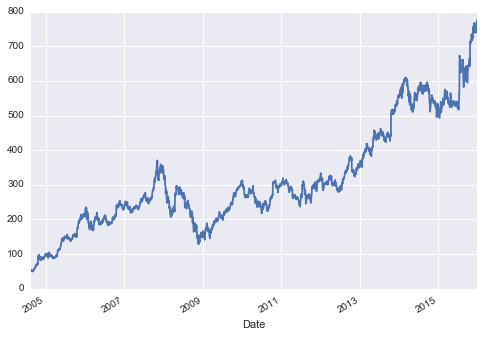

In [ ]:
goog.plot();

### Remuestreo y conversión de frecuencias

Una necesidad común para los datos de las series temporales es el remuestreo a una frecuencia mayor o menor.
Esto puede hacerse utilizando el método ``resample()``, o el método mucho más simple ``asfreq()``.
La principal diferencia entre ambos es que ``resample()`` es fundamentalmente una *agregación de datos*, mientras que ``asfreq()`` es fundamentalmente una *selección de datos*.

Tomando como ejemplo el precio de cierre de Google, comparemos lo que los dos devuelven cuando hacemos un muestreo descendente de los datos.
Aquí vamos a remuestrear los datos al final del año comercial:

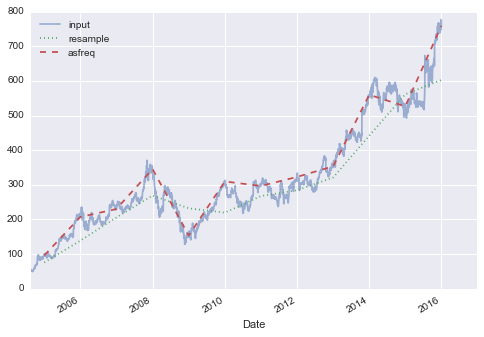

In [ ]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Observe la diferencia: en cada punto, ``resample`` informa de la *media del año anterior*, mientras que ``asfreq`` informa del *valor al final del año*.

Para el muestreo ascendente, ``resample()`` y ``asfreq()`` son en gran medida equivalentes, aunque resample tiene muchas más opciones disponibles.
En este caso, el valor por defecto de ambos métodos es dejar los puntos del muestreo ascendente vacíos, es decir, rellenados con valores NA.
Al igual que con la función ``pd.fillna()`` discutida anteriormente, ``asfreq()`` acepta un argumento ``method`` para especificar cómo se imputan los valores.
En este caso, volveremos a muestrear los datos de los días laborables con una frecuencia diaria (es decir, incluyendo los fines de semana):

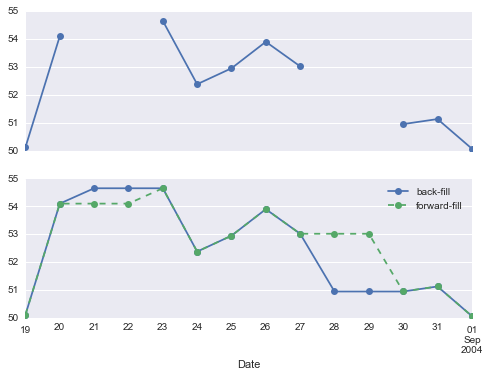

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

El panel superior es el predeterminado: los días no laborables se dejan como valores NA y no aparecen en el gráfico.
El panel inferior muestra las diferencias entre dos estrategias para rellenar los huecos: forward-filling y backward-filling.

### Desplazamientos en el tiempo

Otra operación específica de las series temporales es el desplazamiento de los datos en el tiempo.
Pandas tiene dos métodos estrechamente relacionados para calcular esto: ``shift()`` y ``tshift()``
En resumen, la diferencia entre ellos es que ``shift()`` *desplaza los datos*, mientras que ``tshift()`` *desplaza el índice*.
En ambos casos, el desplazamiento se especifica en múltiplos de la frecuencia.

En este caso, desplazaremos tanto ``shift()`` como ``tshift()`` en 900 días; 

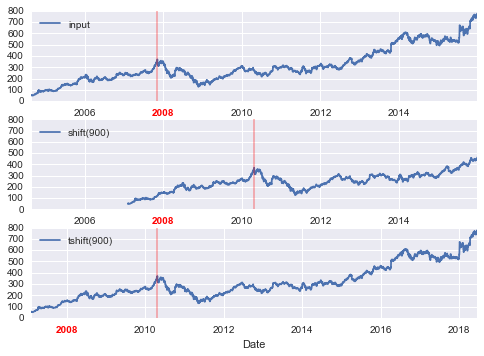

In [ ]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Aquí vemos que ``shift(900)`` desplaza los *datos* en 900 días, empujando algunos de ellos fuera del extremo del gráfico (y dejando los valores NA en el otro extremo), mientras que ``tshift(900)`` desplaza los *valores de índice* en 900 días.

Un contexto común para este tipo de desplazamiento es el cálculo de las diferencias en el tiempo. Por ejemplo, utilizamos los valores desplazados para calcular el rendimiento de la inversión a un año de las acciones de Google a lo largo del conjunto de datos:

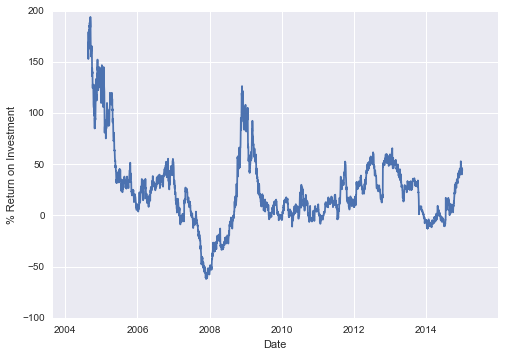

In [ ]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

Esto nos ayuda a ver la tendencia general de las acciones de Google: hasta ahora, los momentos más rentables para invertir en Google han sido (sin sorpresa, en retrospectiva) poco después de su oferta pública inicial, y en medio de la recesión de 2009.

### Rolling windows

Las estadísticas móviles son un tercer tipo de operación específica de las series temporales implementada por Pandas.
Se pueden realizar a través del atributo ``rolling()`` de los objetos ``Series`` y ``DataFrame``, que devuelve una vista similar a la que vimos con la operación ``groupby`` (ver [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)).
Esta vista rodante pone a disposición una serie de operaciones de agregación por defecto.

Por ejemplo, aquí está la media móvil centrada en un año y la desviación estándar de los precios de las acciones de Google:

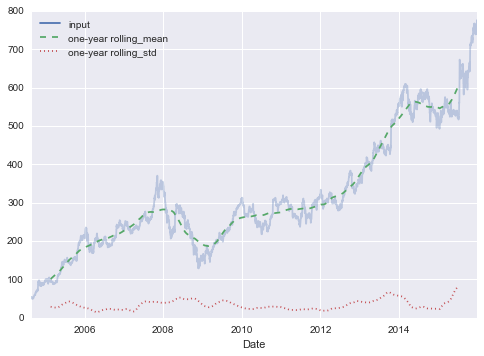

In [ ]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Al igual que con las operaciones de agrupación, los métodos ``agregate()`` y ``apply()`` pueden utilizarse para realizar cálculos de balanceo personalizados.

## Dónde aprender más

Esta sección ha proporcionado sólo un breve resumen de algunas de las características más esenciales de las herramientas de series temporales proporcionadas por Pandas; para una discusión más completa, puede consultar la sección ["Time Series/Date"](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) de la documentación online de Pandas.

Otro recurso excelente es el libro de texto [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) de Wes McKinney (OReilly, 2012).
Aunque ya tiene algunos años, es un recurso inestimable sobre el uso de Pandas.
En particular, este libro hace hincapié en las herramientas de series temporales en el contexto de los negocios y las finanzas, y se centra mucho más en los detalles particulares de los calendarios de los negocios, las zonas horarias y temas relacionados.

Como siempre, también puede utilizar la funcionalidad de ayuda de IPython para explorar y probar otras opciones disponibles para las funciones y métodos que se discuten aquí. Me parece que esta es a menudo la mejor manera de aprender una nueva herramienta de Python.

## Ejemplo: Visualización de los recuentos de bicicletas en Seattle

Como un ejemplo más complicado de trabajar con algunos datos de series temporales, echemos un vistazo a los recuentos de bicicletas en el [Puente de Fremont] de Seattle (http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
Estos datos proceden de un contador de bicicletas automatizado, instalado a finales de 2012, que cuenta con sensores inductivos en las aceras este y oeste del puente.
Los recuentos de bicicletas por hora pueden descargarse en http://data.seattle.gov/; aquí está el [enlace directo al conjunto de datos](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

A partir del verano de 2016, el CSV puede descargarse como sigue:

In [ ]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

Una vez descargado este conjunto de datos, podemos utilizar Pandas para leer la salida CSV en un ``DataFrame``.
Especificaremos que queremos la Fecha como índice, y queremos que estas fechas se analicen automáticamente:

In [ ]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

Fremont Bridge West Sidewalk  \
Date                                                
2012-10-03 00:00:00                           4.0   
2012-10-03 01:00:00                           4.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           2.0   
2012-10-03 04:00:00                           6.0   

                     Fremont Bridge East Sidewalk  
Date                                               
2012-10-03 00:00:00                           9.0  
2012-10-03 01:00:00                           6.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           3.0  
2012-10-03 04:00:00                           1.0

Para mayor comodidad, procesaremos este conjunto de datos acortando los nombres de las columnas y añadiendo una columna "Total":

In [ ]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

Veamos ahora las estadísticas resumidas de estos datos:

In [ ]:
data.dropna().describe()

West          East         Total
count  35752.000000  35752.000000  35752.000000
mean      61.470267     54.410774    115.881042
std       82.588484     77.659796    145.392385
min        0.000000      0.000000      0.000000
25%        8.000000      7.000000     16.000000
50%       33.000000     28.000000     65.000000
75%       79.000000     67.000000    151.000000
max      825.000000    717.000000   1186.000000

### Visualización de los datos

Podemos conocer mejor el conjunto de datos visualizándolo.
Empecemos por trazar los datos en bruto:

In [ ]:
%matplotlib inline
import seaborn; seaborn.set()

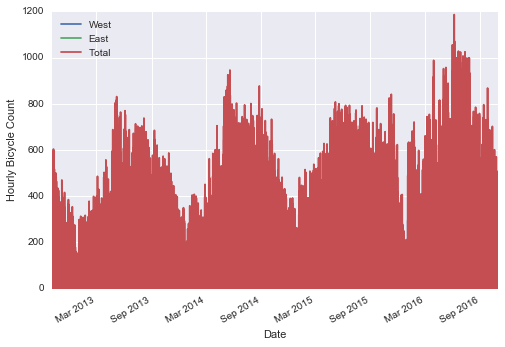

In [ ]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

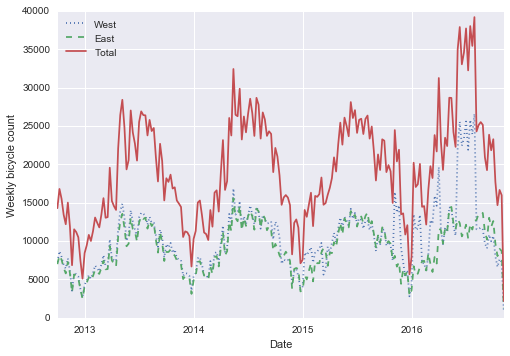

In [ ]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

Esto nos muestra algunas tendencias estacionales interesantes: como es de esperar, la gente va más en bicicleta en verano que en invierno, e incluso dentro de una estación concreta el uso de la bicicleta varía de una semana a otra (probablemente dependiendo del tiempo; véase [En profundidad: Regresión lineal](05.06-Linear-Regression.ipynb) donde exploramos esto más a fondo).

Otra forma que resulta útil para agregar los datos es utilizar una media móvil, utilizando la función ``pd.rolling_mean()``.
Aquí haremos una media móvil de 30 días de nuestros datos, asegurándonos de centrar la ventana:

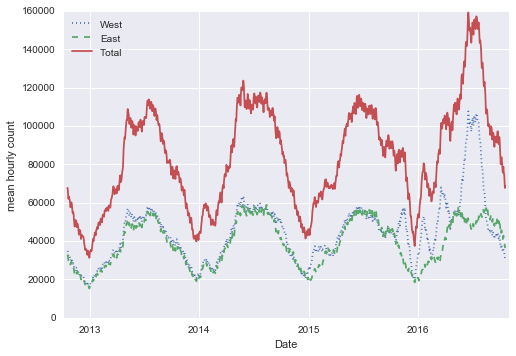

In [ ]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

La irregularidad del resultado se debe al corte duro de la ventana.
Podemos obtener una versión más suave de una media móvil utilizando una función de ventana, por ejemplo, una ventana gaussiana.
El siguiente código especifica tanto el ancho de la ventana (elegimos 50 días) como el ancho de la gaussiana dentro de la ventana (elegimos 10 días):

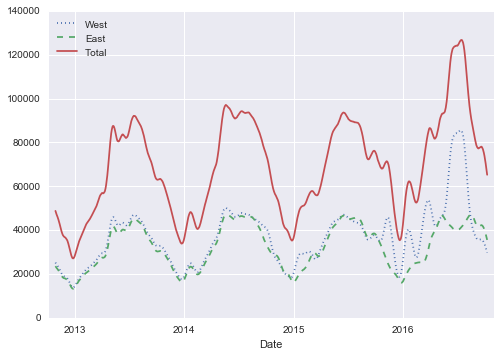

In [ ]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Profundizando en los datos

Aunque estas vistas de datos suavizados son útiles para hacerse una idea de la tendencia general de los datos, ocultan gran parte de la estructura interesante.
Por ejemplo, podríamos querer ver el tráfico medio en función de la hora del día.
Podemos hacerlo utilizando la funcionalidad GroupBy que se discute en [Agregación y agrupación](03.08-Agregación-y-agrupación.ipynb):

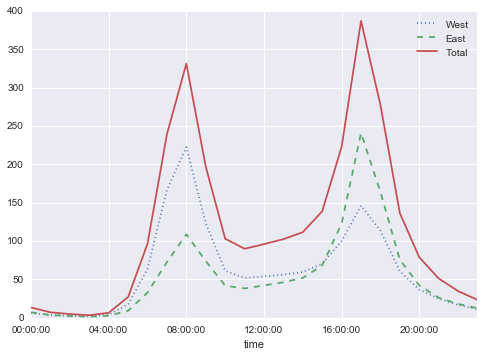

In [ ]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

El tráfico por hora presenta una distribución fuertemente bimodal, con picos alrededor de las 8:00 de la mañana y las 5:00 de la tarde.
Esto es probablemente una prueba de un fuerte componente de tráfico de cercanías que cruza el puente.
Esto se evidencia también por las diferencias entre la acera oeste (generalmente utilizada en dirección al centro de Seattle), que alcanza un pico más fuerte por la mañana, y la acera este (generalmente utilizada en dirección contraria al centro de Seattle), que alcanza un pico más fuerte por la tarde.

También nos interesa saber cómo cambian las cosas en función del día de la semana. De nuevo, podemos hacerlo con un simple groupby:

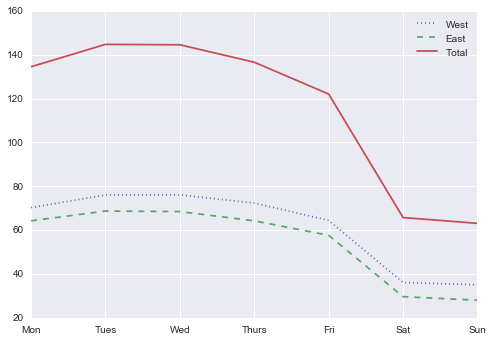

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

Esto muestra una fuerte distinción entre los totales de los días de la semana y los fines de semana, con alrededor del doble de ciclistas promedio cruzando el puente de lunes a viernes que los sábados y domingos.

Teniendo esto en cuenta, hagamos un GroupBy compuesto y veamos la tendencia horaria de los días laborables frente a los fines de semana.
Empezaremos agrupando por la bandera que marca el fin de semana y por la hora del día:

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Ahora usaremos algunas de las herramientas de Matplotlib descritas en [Multiple Subplots](04.08-Multiple-Subplots.ipynb) para trazar dos paneles uno al lado del otro:

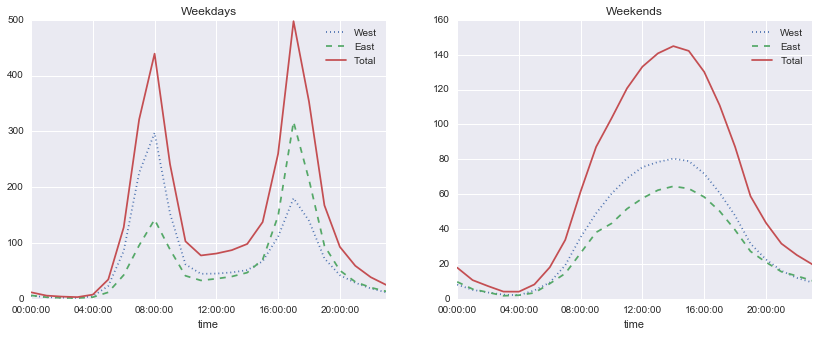

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

El resultado es muy interesante: vemos un patrón de desplazamiento bimodal durante la semana laboral, y un patrón recreativo unimodal durante los fines de semana.
Sería interesante analizar estos datos con más detalle y examinar el efecto del clima, la temperatura, la época del año y otros factores en los patrones de desplazamiento de la gente; para más información, véase mi entrada en el blog ["¿Está Seattle realmente experimentando un aumento del uso de la bicicleta?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), que utiliza un subconjunto de estos datos.
También revisaremos este conjunto de datos en el contexto de la modelización en [En profundidad: Regresión lineal](05.06-Regresión-lineal.ipynb).